In [24]:
import pandas as pd  # Importing pandas library for data manipulation and analysis
import matplotlib.pyplot as plt  # Importing matplotlib library for data visualization
import numpy as np  # Importing numpy library for numerical computing
import seaborn as sns  # Importing seaborn library for enhanced data visualization
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV  # Importing functions for splitting data, cross-validation, and grid search
from sklearn.linear_model import LinearRegression, Ridge, Lasso  # Importing linear regression models: Linear Regression, Ridge Regression, Lasso Regression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, HistGradientBoostingRegressor  # Importing ensemble regression models: Random Forest Regressor, Gradient Boosting Regressor, Histogram-based Gradient Boosting Regressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score  # Importing evaluation metrics for regression models: Mean Squared Error, Mean Absolute Error, R-squared
from sklearn.pipeline import Pipeline  # Importing pipeline for chaining multiple estimators
from sklearn.impute import SimpleImputer  # Importing SimpleImputer for handling missing values
from sklearn.svm import SVR  # Importing Support Vector Regressor model
from sklearn.neural_network import MLPRegressor  # Importing Multi-layer Perceptron Regressor model

In [25]:
# Load data
housing_prices = pd.read_csv('C:/Users/mique/data/housing.csv')

In [26]:
# Checking the DF size
housing_prices.shape

(20640, 10)

In [27]:
# setting a new dataframe with 300 rows as CA requirements
housing_prices = housing_prices.head(300)
housing_prices.shape

(300, 10)

In [28]:
#checking for null values
housing_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           300 non-null    float64
 1   latitude            300 non-null    float64
 2   housing_median_age  300 non-null    float64
 3   total_rooms         300 non-null    float64
 4   total_bedrooms      299 non-null    float64
 5   population          300 non-null    float64
 6   households          300 non-null    float64
 7   median_income       300 non-null    float64
 8   median_house_value  300 non-null    float64
 9   ocean_proximity     300 non-null    object 
dtypes: float64(9), object(1)
memory usage: 23.6+ KB


In [29]:
# Deleting null values
housing_prices.dropna(inplace=True)

In [30]:
housing_prices.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [31]:
# Deleting the "ocean_proximity" column
housing_prices.drop("ocean_proximity", axis=1, inplace=True)


<Figure size 1500x1000 with 0 Axes>

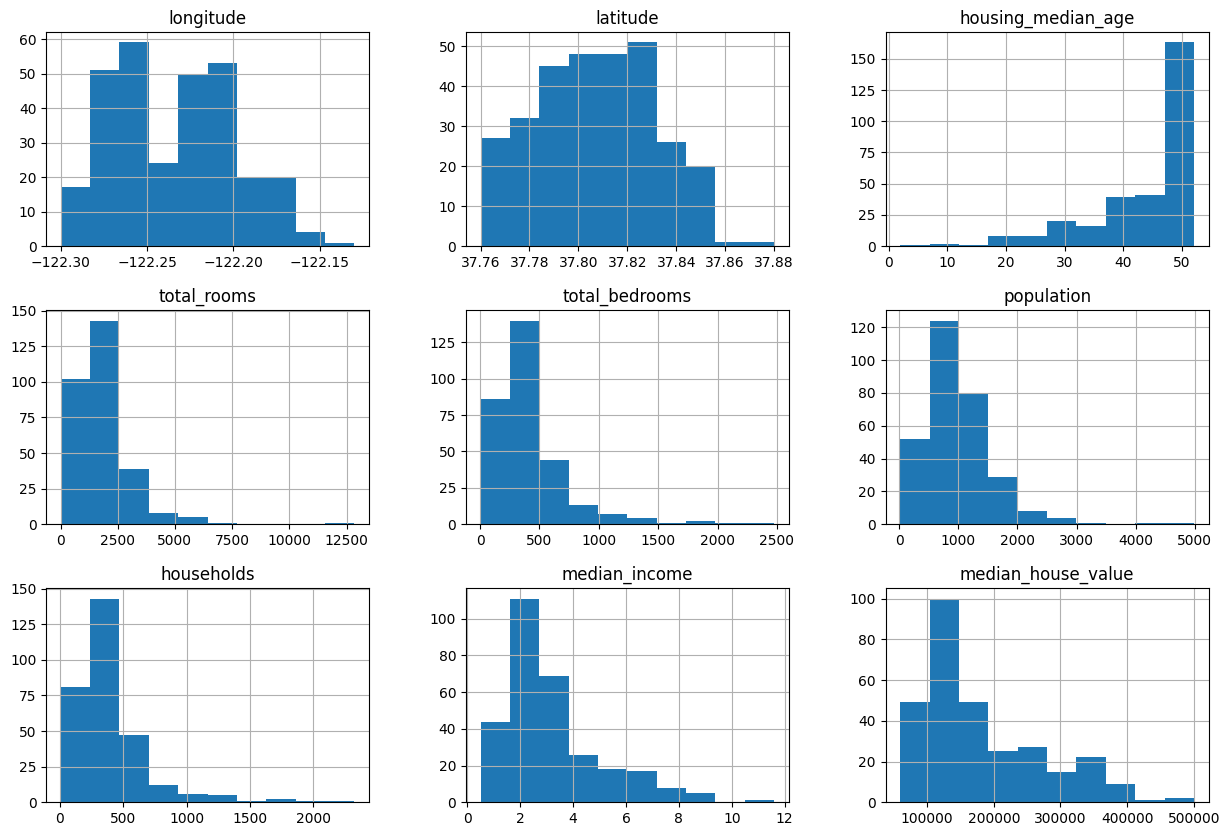

In [32]:
# Visualizing data with adjusted figure size
plt.figure(figsize=(15, 10))  # Adjusted figure size
housing_prices.hist(figsize=(15, 10))  # Adjusted figsize for histogram
plt.show()

In [33]:
# Splitting the data into features (X) and target variable (y)
X = housing_prices.drop(['median_house_value'], axis=1)
y = housing_prices['median_house_value']

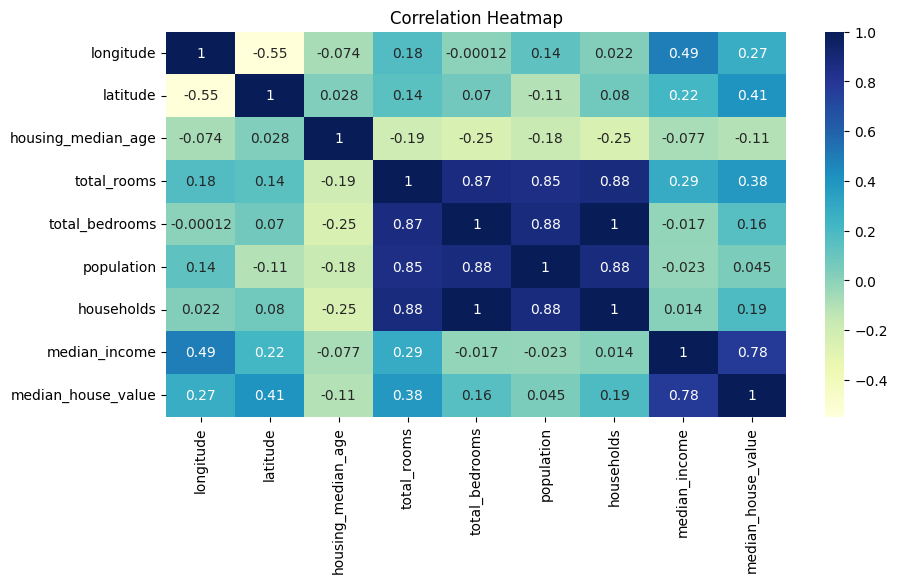

In [34]:
# Analyze correlation using heatmap
train_housing_prices = X.join(y)
plt.figure(figsize=(10, 5))
sns.heatmap(train_housing_prices.corr(), annot=True, cmap="YlGnBu", annot_kws={"size": 10})
plt.title("Correlation Heatmap")
plt.show()

In [38]:
# Specify test sizes
test_sizes = [0.2, 0.25, 0.3,]

In [41]:
def train_and_evaluate(X, y, test_sizes):
    results = {'Linear Regression': {}, 'Ridge': {}, 'Lasso': {}, 'SVR': {}, 'Random Forest Regressor': {}, 'Gradient Boosting Regressor': {}, 'Neural Network': {}}
    
    for test_size in test_sizes:
        # Splitting the data into training and test sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
        
        # Define models
        models = {'Linear Regression': LinearRegression(),
                  'Ridge': Ridge(),
                  'Lasso': Lasso(),
                  'SVR': SVR(),
                  'Random Forest Regressor': RandomForestRegressor(),
                  'Gradient Boosting Regressor': GradientBoostingRegressor(),
                  'Neural Network': MLPRegressor(hidden_layer_sizes=(50, 50), max_iter=1000)}
        
        for model_name, model in models.items():
            # Train the model
            model.fit(X_train, y_train)
            
            # Evaluate using cross-validation
            cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
            cv_rmse = np.sqrt(-cv_scores.mean())  # Calculate RMSE from negative MSE scores
            
            # Predict on test set
            y_pred = model.predict(X_test)
            
            # Calculate evaluation metrics
            rmse = np.sqrt(mean_squared_error(y_test, y_pred))
            mae = mean_absolute_error(y_test, y_pred)
            r2 = r2_score(y_test, y_pred)
            
            # Store results
            results[model_name][test_size] = {'RMSE': rmse, 'MAE': mae, 'R2': r2, 'CV RMSE': cv_rmse}
            
            # Print results
            print(f"{model_name} Test Score (Test Size: {test_size}):")
            print(f"RMSE: {rmse}, MAE: {mae}, R2: {r2}, Cross-Validation RMSE: {cv_rmse}")
            print("----------------------------------------------")
    
    return results

# Train and evaluate
results = train_and_evaluate(X, y, test_sizes)

# Print results
for model_name, result in results.items():
    print(f"Results for {model_name}:")
    for test_size, metrics in result.items():
        print(f"Test Size: {test_size}, Metrics: {metrics}")
    print("----------------------------------------------")

# Hyperparameter tuning for the Random Forest Regressor model using GridSearchCV
param_grid = {
    'n_estimators': [3, 10, 30], 
    'max_features': [2, 4, 8],    
}

# Create Random Forest Regressor model
forest = RandomForestRegressor()

# Perform Grid Search with Random Forest Regressor
grid_search = GridSearchCV(forest, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)

# Fit the grid search to the data
grid_search.fit(X, y)

# Get best estimator
best_random_forest = grid_search.best_estimator_

# Train the model on your data
best_random_forest.fit(X, y)

# Check the score on the training data
train_score = best_random_forest.score(X, y)
print("Training Score:", train_score)

Linear Regression Test Score (Test Size: 0.2):
RMSE: 47343.095783090765, MAE: 34032.790518825976, R2: 0.7266723175138028, Cross-Validation RMSE: 51749.55302182006
----------------------------------------------
Ridge Test Score (Test Size: 0.2):
RMSE: 46554.50305426926, MAE: 33401.90775298993, R2: 0.7357021057931412, Cross-Validation RMSE: 54059.80305049903
----------------------------------------------
Lasso Test Score (Test Size: 0.2):
RMSE: 47337.68052157162, MAE: 34033.21545051083, R2: 0.7267348422053073, Cross-Validation RMSE: 51753.52281395329
----------------------------------------------
SVR Test Score (Test Size: 0.2):
RMSE: 94925.03096442051, MAE: 68864.88604200075, R2: -0.09883328837222316, Cross-Validation RMSE: 96977.6658535383
----------------------------------------------


C:\Users\mique\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.476e+11, tolerance: 1.959e+08
  model = cd_fast.enet_coordinate_descent(
C:\Users\mique\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.348e+11, tolerance: 1.597e+08
  model = cd_fast.enet_coordinate_descent(
C:\Users\mique\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.163e+11, toleranc

Random Forest Regressor Test Score (Test Size: 0.2):
RMSE: 49313.44065038772, MAE: 32285.037166666665, R2: 0.70344795573011, Cross-Validation RMSE: 49366.76876446007
----------------------------------------------
Gradient Boosting Regressor Test Score (Test Size: 0.2):
RMSE: 45145.93729195444, MAE: 31118.48141916892, R2: 0.75145349496028, Cross-Validation RMSE: 49494.56275666566
----------------------------------------------


C:\Users\mique\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\mique\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\mique\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\mique\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\mique\anaconda3\Lib\site-packages\sklearn\neural_network\_m

Neural Network Test Score (Test Size: 0.2):
RMSE: 70838.2941496185, MAE: 51053.79511802867, R2: 0.3880632980788664, Cross-Validation RMSE: 95370.55383637758
----------------------------------------------
Linear Regression Test Score (Test Size: 0.25):
RMSE: 45908.15338485465, MAE: 34119.233194262844, R2: 0.7524005072372337, Cross-Validation RMSE: 53632.77955126136
----------------------------------------------
Ridge Test Score (Test Size: 0.25):
RMSE: 45020.42479572983, MAE: 33160.92279702956, R2: 0.7618836155148105, Cross-Validation RMSE: 56659.20390741334
----------------------------------------------
Lasso Test Score (Test Size: 0.25):
RMSE: 45890.237099798804, MAE: 34105.985101295526, R2: 0.7525937277067081, Cross-Validation RMSE: 53641.59511930521
----------------------------------------------
SVR Test Score (Test Size: 0.25):
RMSE: 96983.4325619399, MAE: 71878.47640659031, R2: -0.10500744718832777, Cross-Validation RMSE: 95555.74939587044
-----------------------------------------

C:\Users\mique\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\mique\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\mique\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\mique\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\mique\anaconda3\Lib\site-packages\sklearn\neural_network\_m

Neural Network Test Score (Test Size: 0.25):
RMSE: 77438.69896126588, MAE: 49777.461267589446, R2: 0.2954915632770705, Cross-Validation RMSE: 86627.44872524224
----------------------------------------------
Linear Regression Test Score (Test Size: 0.3):
RMSE: 44112.762740333514, MAE: 33145.29320476874, R2: 0.7614691195745202, Cross-Validation RMSE: 55376.16893159426
----------------------------------------------
Ridge Test Score (Test Size: 0.3):
RMSE: 43703.921408800736, MAE: 32481.040935243564, R2: 0.7658700846656445, Cross-Validation RMSE: 57208.121379750395
----------------------------------------------
Lasso Test Score (Test Size: 0.3):
RMSE: 44092.211358343295, MAE: 33122.15643092433, R2: 0.761691322720467, Cross-Validation RMSE: 55370.121613332
----------------------------------------------
SVR Test Score (Test Size: 0.3):
RMSE: 93807.16655982065, MAE: 70357.43904765356, R2: -0.0786688360402572, Cross-Validation RMSE: 96406.7820121342
--------------------------------------------

C:\Users\mique\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\mique\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\mique\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\mique\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\mique\anaconda3\Lib\site-packages\sklearn\neural_network\_m

Neural Network Test Score (Test Size: 0.3):
RMSE: 81359.13959460781, MAE: 50704.54929501271, R2: 0.1886116099222318, Cross-Validation RMSE: 86738.41214839017
----------------------------------------------
Results for Linear Regression:
Test Size: 0.2, Metrics: {'RMSE': 47343.095783090765, 'MAE': 34032.790518825976, 'R2': 0.7266723175138028, 'CV RMSE': 51749.55302182006}
Test Size: 0.25, Metrics: {'RMSE': 45908.15338485465, 'MAE': 34119.233194262844, 'R2': 0.7524005072372337, 'CV RMSE': 53632.77955126136}
Test Size: 0.3, Metrics: {'RMSE': 44112.762740333514, 'MAE': 33145.29320476874, 'R2': 0.7614691195745202, 'CV RMSE': 55376.16893159426}
----------------------------------------------
Results for Ridge:
Test Size: 0.2, Metrics: {'RMSE': 46554.50305426926, 'MAE': 33401.90775298993, 'R2': 0.7357021057931412, 'CV RMSE': 54059.80305049903}
Test Size: 0.25, Metrics: {'RMSE': 45020.42479572983, 'MAE': 33160.92279702956, 'R2': 0.7618836155148105, 'CV RMSE': 56659.20390741334}
Test Size: 0.3, M